In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("C:/Users/tapas/Downloads/smartphones_research.csv")

In [ ]:
df.head()

In [ ]:
# Task 2

# a) displaying the summary statistics of numerical columns
print("Summary statistics:\n {}".format(df.describe()))

# Geting information about the dataset, including data types and missing values
print("Information about the dataset:\n {}".format(df.info()))


In [25]:
pip install seaborn


SyntaxError: invalid syntax (3385869228.py, line 1)

In [ ]:
sns.histplot(df['processor_speed'], bins=20)
plt.xlabel('processor_speed')
plt.ylabel('Frequency')
plt.title('Histogram plot for processor speed')
plt.show()

In [ ]:
# Task2 (b)

# Example: Creating a bar plot for the number of phones with 5G capability
sns.countplot(x='fast_charging_available', data=df)
plt.xlabel('fast_charging_available')
plt.ylabel('Count')
plt.title('Number of Phones with fast_charging_available')
plt.show()


In [11]:
df.isnull().sum()


brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

In [12]:
# Task-3(a)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling missing values in 'battery_capacity' with the mean value
battery_capacity_mean= df['battery_capacity'].mean()
df['battery_capacity'].fillna(battery_capacity_mean, inplace=True)

# Converting 'brand_name' and 'os' columns to numerical labels
label_encoder_ts = LabelEncoder()
df['brand_name'] = label_encoder_ts.fit_transform(df['brand_name'])
df['os'] = label_encoder_ts.fit_transform(df['os'])

# Normalizing numerical features: Standardize the 'price' column
scaler_ts = StandardScaler()
df['price'] = scaler_ts.fit_transform(df[['price']])

# Dropping unnecessary columns if needed (e.g., 'model' and 'resolution_width' in this case)
#df_AJ.drop(['model', 'resolution_width'], axis=1, inplace=True) REQUIRED

# Print the first few rows of the preprocessed DataFrame
print(df.head())

# Save the preprocessed DataFrame to a new CSV file (if needed)

   brand_name                    model     price  avg_rating  5G_or_not  \
0           0          Apple iPhone 11  0.163964         7.3          0   
1           0  Apple iPhone 11 (128GB)  0.366436         7.5          0   
2           0  Apple iPhone 11 Pro Max  1.958398         7.7          0   
3           0          Apple iPhone 12  0.492981         7.4          1   
4           0  Apple iPhone 12 (128GB)  0.594217         7.5          1   

  processor_brand  num_cores  processor_speed  battery_capacity  \
0          bionic        6.0             2.65       3110.000000   
1          bionic        6.0             2.65       3110.000000   
2          bionic        6.0             2.65       3500.000000   
3          bionic        6.0             3.10       4817.748194   
4          bionic        6.0             3.10       4817.748194   

   fast_charging_available  ...  internal_memory  screen_size  refresh_rate  \
0                        0  ...               64          6.1      

In [ ]:
#task-3.b
# Check for missing values in the dataset
print(df.isnull().sum())

# Handling missing values in 'battery_capacity' column: Fill with mean value
mean_battery_capacity = df['battery_capacity'].mean()
df['battery_capacity'].fillna(mean_battery_capacity, inplace=True)

avg_rating = df ['avg_rating'].mean()
df['avg_rating'].fillna(avg_rating, inplace=True)


fast_charging = df['fast_charging'].mode()[0]
df['fast_charging'].fillna(fast_charging, inplace=True)

processor_speed = df['processor_speed'].mean()
df['processor_speed'].fillna(processor_speed, inplace=True)

num_cores = df['num_cores'].mode()[0]
df['num_cores'].fillna(num_cores, inplace=True)

print(df.head())
print(df.isnull().sum())
# Handling missing values in other columns (if any) using appropriate methods
# For example, you can drop rows with missing values using df_AJ.dropna(), or fill with median, mode, etc.

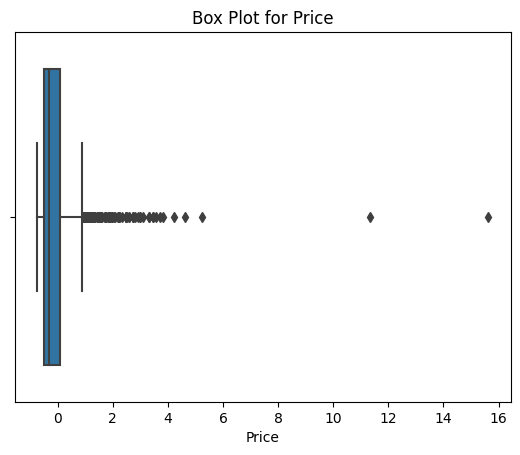

   brand_name                    model     price  avg_rating  5G_or_not  \
0           0          Apple iPhone 11  0.163964         7.3          0   
1           0  Apple iPhone 11 (128GB)  0.366436         7.5          0   
3           0          Apple iPhone 12  0.492981         7.4          1   
4           0  Apple iPhone 12 (128GB)  0.594217         7.5          1   
5           0  Apple iPhone 12 (256GB)  0.897925         7.6          1   

  processor_brand  num_cores  processor_speed  battery_capacity  \
0          bionic        6.0             2.65       3110.000000   
1          bionic        6.0             2.65       3110.000000   
3          bionic        6.0             3.10       4817.748194   
4          bionic        6.0             3.10       4817.748194   
5          bionic        6.0             3.10       4817.748194   

   fast_charging_available  ...  internal_memory  screen_size  refresh_rate  \
0                        0  ...               64          6.1      

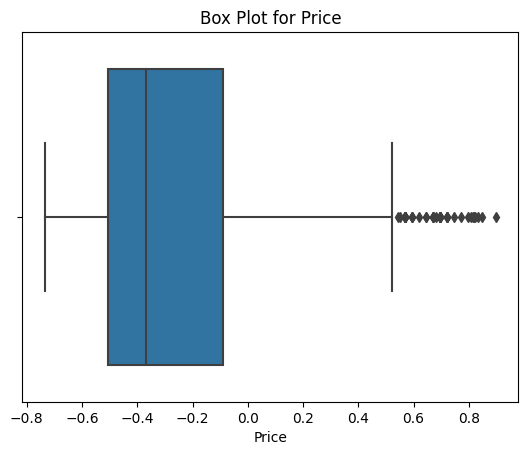

In [13]:
# task-3(b)
# handling outliner
import seaborn as sns

# Example: Detecting outliers in 'price' column using a box plot
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Box Plot for Price')
plt.show()

# For example, to remove outliers in 'price', you can use:
# Handling outliers by Removing outliers in 'price' using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df = df[df['price'] < upper_bound]
print(df.head())

sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Box Plot for Price')
plt.show()

In [15]:
# task-3(b)

df['pixel_density'] = df['resolution_height'] / df['screen_size']
print(df.head())

   brand_name                    model     price  avg_rating  5G_or_not  \
0           0          Apple iPhone 11  0.163964         7.3          0   
1           0  Apple iPhone 11 (128GB)  0.366436         7.5          0   
3           0          Apple iPhone 12  0.492981         7.4          1   
4           0  Apple iPhone 12 (128GB)  0.594217         7.5          1   
5           0  Apple iPhone 12 (256GB)  0.897925         7.6          1   

  processor_brand  num_cores  processor_speed  battery_capacity  \
0          bionic        6.0             2.65       3110.000000   
1          bionic        6.0             2.65       3110.000000   
3          bionic        6.0             3.10       4817.748194   
4          bionic        6.0             3.10       4817.748194   
5          bionic        6.0             3.10       4817.748194   

   fast_charging_available  ...  screen_size  refresh_rate  num_rear_cameras  \
0                        0  ...          6.1            60        

In [20]:
#TASK-4(A)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Loading the dataset
df = pd.read_csv("C:/Users/tapas/Downloads/smartphones_research.csv")

# Preprocessing the data
mean_battery_capacity_ts = df['battery_capacity'].mean()
df['battery_capacity'].fillna(mean_battery_capacity_ts, inplace=True)
df['pixel_density'] = df['resolution_height'] / df['screen_size']
df.drop(['model', 'resolution_width'], axis=1, inplace=True)

# Handling missing values in other columns (if any) using appropriate methods
# droping rows with dropna() fxn
df.dropna(subset=['processor_brand'], inplace=True)

# One-hot encoding for 'brand_name', 'processor_brand', and 'os' columns
df = pd.get_dummies(df, columns=['processor_brand', 'brand_name', 'os'], drop_first=True)

# Splitting the data into features (x) and target (y)
feature_x = df.drop('5G_or_not', axis=1)
target_y = df['5G_or_not']

# Handle missing values in feature_x
imputer = SimpleImputer(strategy='mean')
feature_x = pd.DataFrame(imputer.fit_transform(feature_x), columns=feature_x.columns)

# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(feature_x, target_y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler_ts = StandardScaler()
x_train_scaled_ts = scaler_ts.fit_transform(x_train)
x_test_scaled_ts = scaler_ts.transform(x_test)

# Implementing SVM classifier
svm_model_ts = SVC(kernel='linear', random_state=42)
svm_model_ts.fit(x_train_scaled_ts, y_train)

# Making predictions using SVM
y_pred_svm = svm_model_ts.predict(x_test_scaled_ts)

# Implementing Random Forest classifier
ts_model = RandomForestClassifier(n_estimators=100, random_state=42)
ts_model.fit(x_train, y_train)

# Making predictions using Random Forest
y_pred_ts = ts_model.predict(x_test)

# Evaluating the models
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_ts))

# Printing classification reports for both models
print("SVM Model Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_ts))

# Printing confusion matrix for both models
print("SVM Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("Random Forest Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ts))


SVM Model Accuracy: 0.8958333333333334
Random Forest Model Accuracy: 0.921875
SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        85
           1       0.90      0.92      0.91       107

    accuracy                           0.90       192
   macro avg       0.90      0.89      0.89       192
weighted avg       0.90      0.90      0.90       192

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        85
           1       0.93      0.93      0.93       107

    accuracy                           0.92       192
   macro avg       0.92      0.92      0.92       192
weighted avg       0.92      0.92      0.92       192

SVM Model Confusion Matrix:
[[74 11]
 [ 9 98]]
Random Forest Model Confusion Matrix:
[[ 77   8]
 [  7 100]]


In [21]:
# TASK-4.B
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluating the SVM model
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-Score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Evaluate Random Forest model
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ts))
print("Precision:", precision_score(y_test, y_pred_ts))
print("Recall:", recall_score(y_test, y_pred_ts))
print("F1-Score:", f1_score(y_test, y_pred_ts))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ts))


SVM Model Performance:
Accuracy: 0.8958333333333334
Precision: 0.8990825688073395
Recall: 0.9158878504672897
F1-Score: 0.9074074074074073
Confusion Matrix:
[[74 11]
 [ 9 98]]

Random Forest Model Performance:
Accuracy: 0.921875
Precision: 0.9259259259259259
Recall: 0.9345794392523364
F1-Score: 0.9302325581395349
Confusion Matrix:
[[ 77   8]
 [  7 100]]


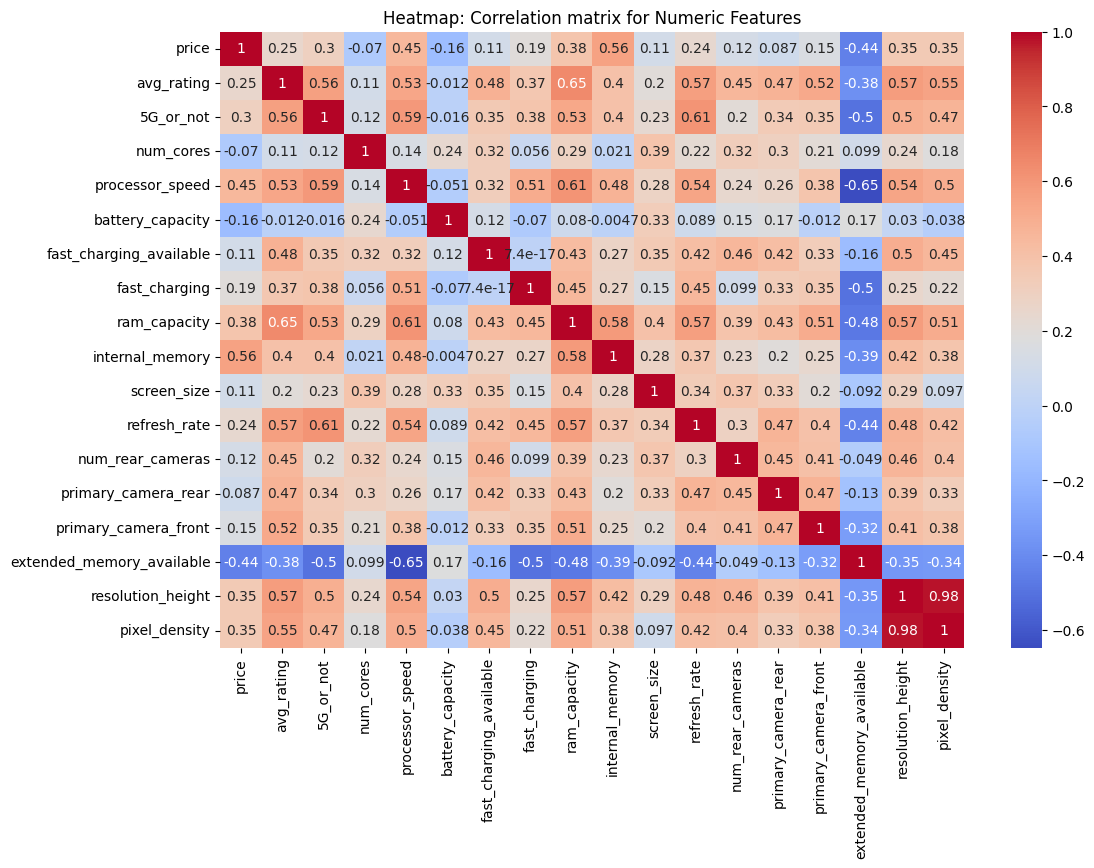

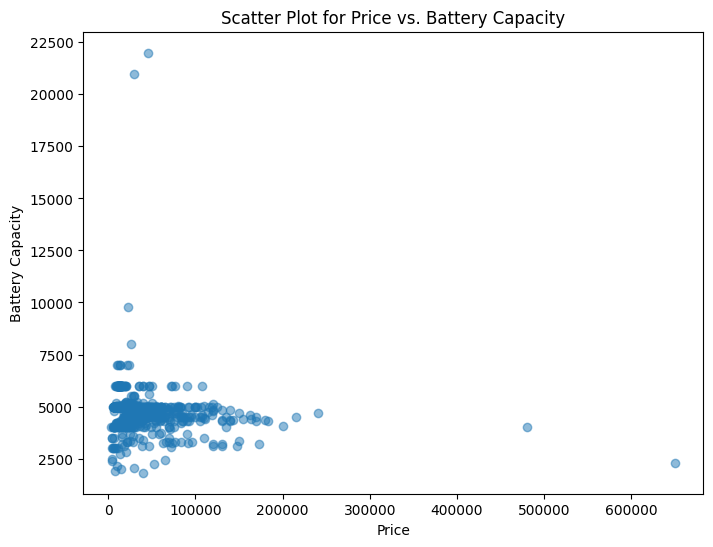

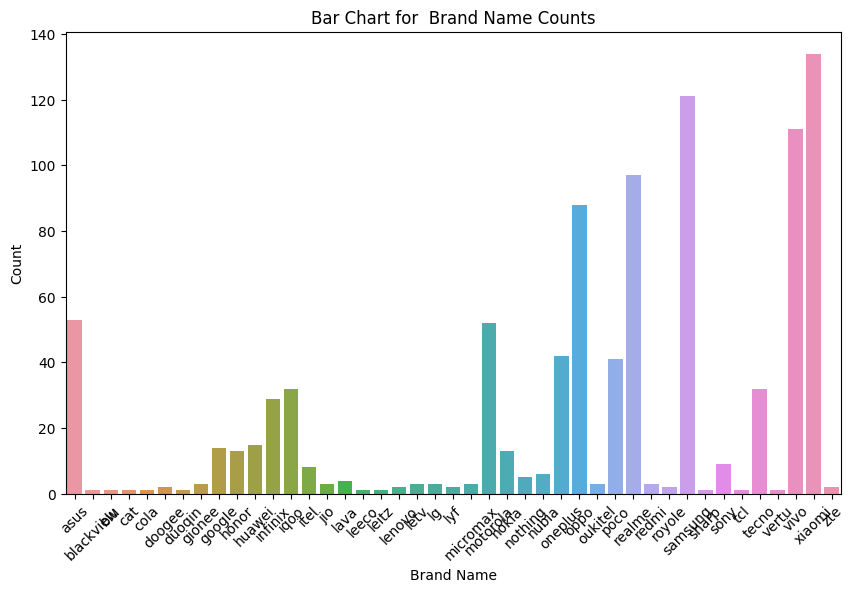

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Loading the dataset
df = pd.read_csv("C:/Users/tapas/Downloads/smartphones_research.csv")
# Preprocessing the data (same preprocessing as before)
mean_battery_capacity_ts = df['battery_capacity'].mean()
df['battery_capacity'].fillna(mean_battery_capacity_ts, inplace=True)
df['pixel_density'] = df['resolution_height'] / df['screen_size']
df.drop(['model', 'resolution_width'], axis=1, inplace=True)
df.dropna(subset=['processor_brand'], inplace=True)
df = pd.get_dummies(df, columns=['processor_brand', 'brand_name', 'os'], drop_first=True)

# Converting one-hot encoded 'brand_name' back to categorical columns
brand_name_cols_ts = [col for col in df.columns if col.startswith('brand_name_')]
df['brand_name'] = df[brand_name_cols_ts].idxmax(axis=1).str.replace('brand_name_', '')

# Droping the one-hot encoded 'brand_name' columns
df.drop(brand_name_cols_ts, axis=1, inplace=True)

# Selecing numeric columns for correlation matrix
numeric_columns_ts = df.select_dtypes(include=[float, int]).columns
df_numeric_ts = df[numeric_columns_ts]

# Handling missing values in numeric columns
imputer_ts = SimpleImputer(strategy='mean')
df_numeric_imputed_ts = pd.DataFrame(imputer.fit_transform(df_numeric_ts), columns=df_numeric_ts.columns)

# Creating the correlation matrix
correlation_matrix_ts = df_numeric_imputed_ts.corr()

# Ploting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_ts, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation matrix for Numeric Features')
plt.show()

# Scatter plot of 'price' vs. 'battery_capacity'
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['battery_capacity'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Battery Capacity')
plt.title('Scatter Plot for Price vs. Battery Capacity')
plt.show()

# Bar chart plot for 'brand_name' counts
plt.figure(figsize=(10, 6))
sns.countplot(x='brand_name', data=df)
plt.xticks(rotation=45)
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Bar Chart for  Brand Name Counts')
plt.show()


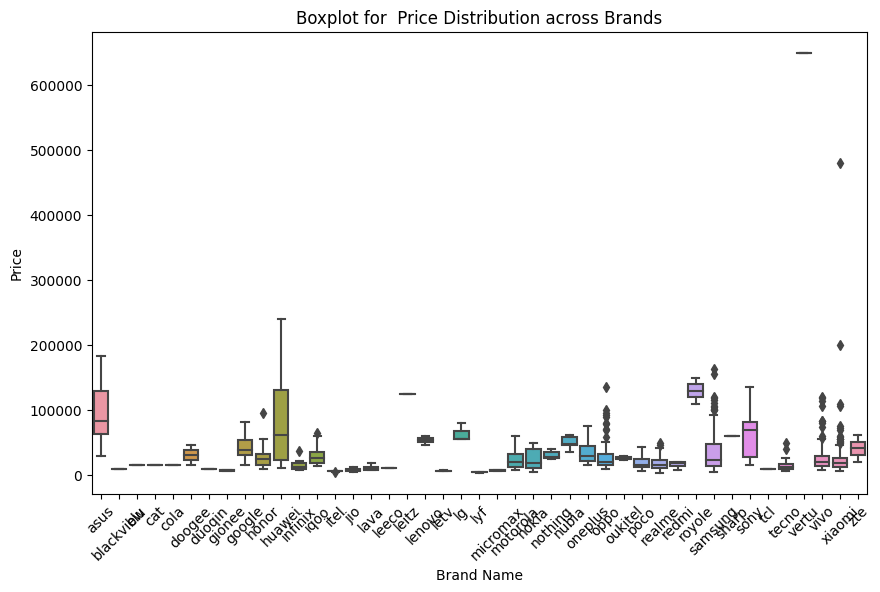

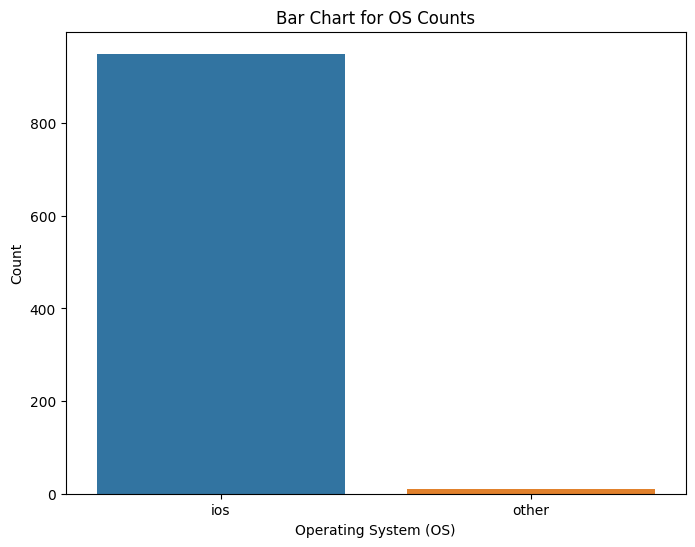

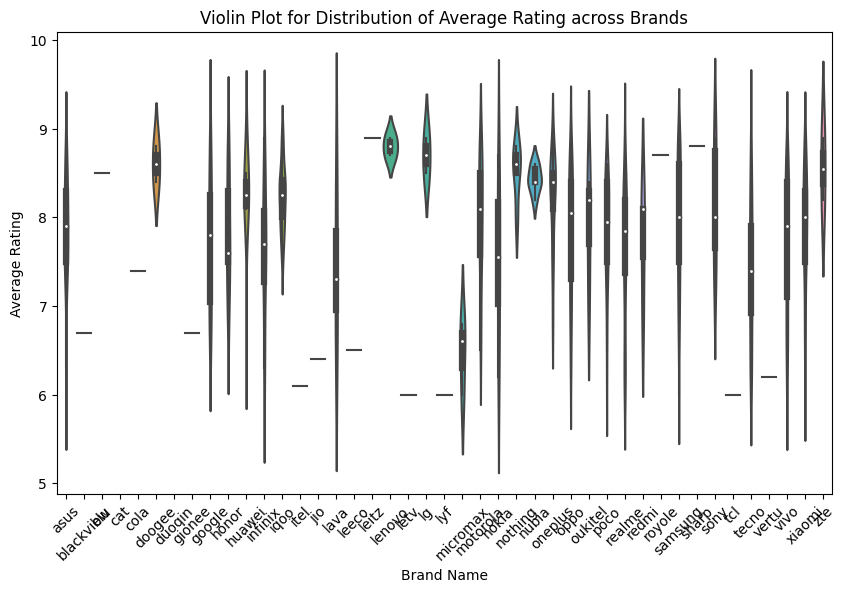

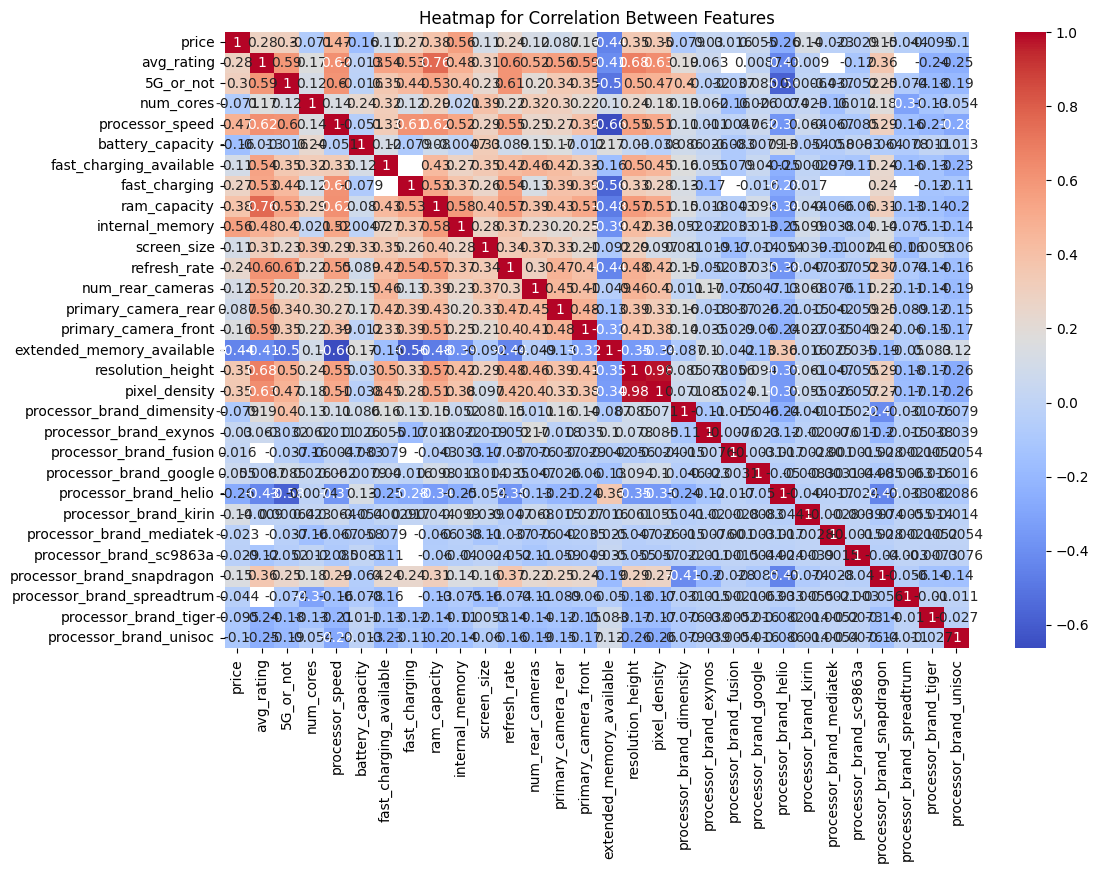

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Loading the dataset
df = pd.read_csv("C:/Users/tapas/Downloads/smartphones_research.csv")

# Preprocessing the data 
mean_battery_capacity_ts = df['battery_capacity'].mean()
df['battery_capacity'].fillna(mean_battery_capacity_ts, inplace=True)
df['pixel_density'] = df['resolution_height'] / df['screen_size']
df.drop(['model', 'resolution_width'], axis=1, inplace=True)
df.dropna(subset=['processor_brand'], inplace=True)
df = pd.get_dummies(df, columns=['processor_brand', 'brand_name', 'os'], drop_first=True)

# Convert one-hot encoded 'brand_name' and 'os' back to categorical columns
brand_name_cols_ts = [col for col in df.columns if col.startswith('brand_name_')]
df['brand_name'] = df[brand_name_cols_ts].idxmax(axis=1).str.replace('brand_name_', '')
df.drop(brand_name_cols_ts, axis=1, inplace=True)

os_cols = [col for col in df.columns if col.startswith('os_')]
df['os'] = df[os_cols].idxmax(axis=1).str.replace('os_', '')
df.drop(os_cols, axis=1, inplace=True)

# Plotting multiple visualizations

# 2. Boxplot to compare the distribution of 'price' across brands
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand_name', y='price', data=df)
plt.xticks(rotation=45)
plt.xlabel('Brand Name')
plt.ylabel('Price')
plt.title('Boxplot for  Price Distribution across Brands')
plt.show()

# 3. Bar chart plot for 'os' counts
plt.figure(figsize=(8, 6))
sns.countplot(x='os', data=df)
plt.xlabel('Operating System (OS)')
plt.ylabel('Count')
plt.title('Bar Chart for OS Counts')
plt.show()

# 4. Violin plot for comparing the distribution of 'avg_rating' across brands
plt.figure(figsize=(10, 6))
sns.violinplot(x='brand_name', y='avg_rating', data=df)
plt.xticks(rotation=45)
plt.xlabel('Brand Name')
plt.ylabel('Average Rating')
plt.title('Violin Plot for Distribution of Average Rating across Brands')
plt.show()

# 5. Droping the non-numeric columns 'brand_name' and 'os' for the heatmap
df_corr_ts = df.drop(['brand_name', 'os'], axis=1)

# 6. Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr_ts.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation Between Features')
plt.show()


c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


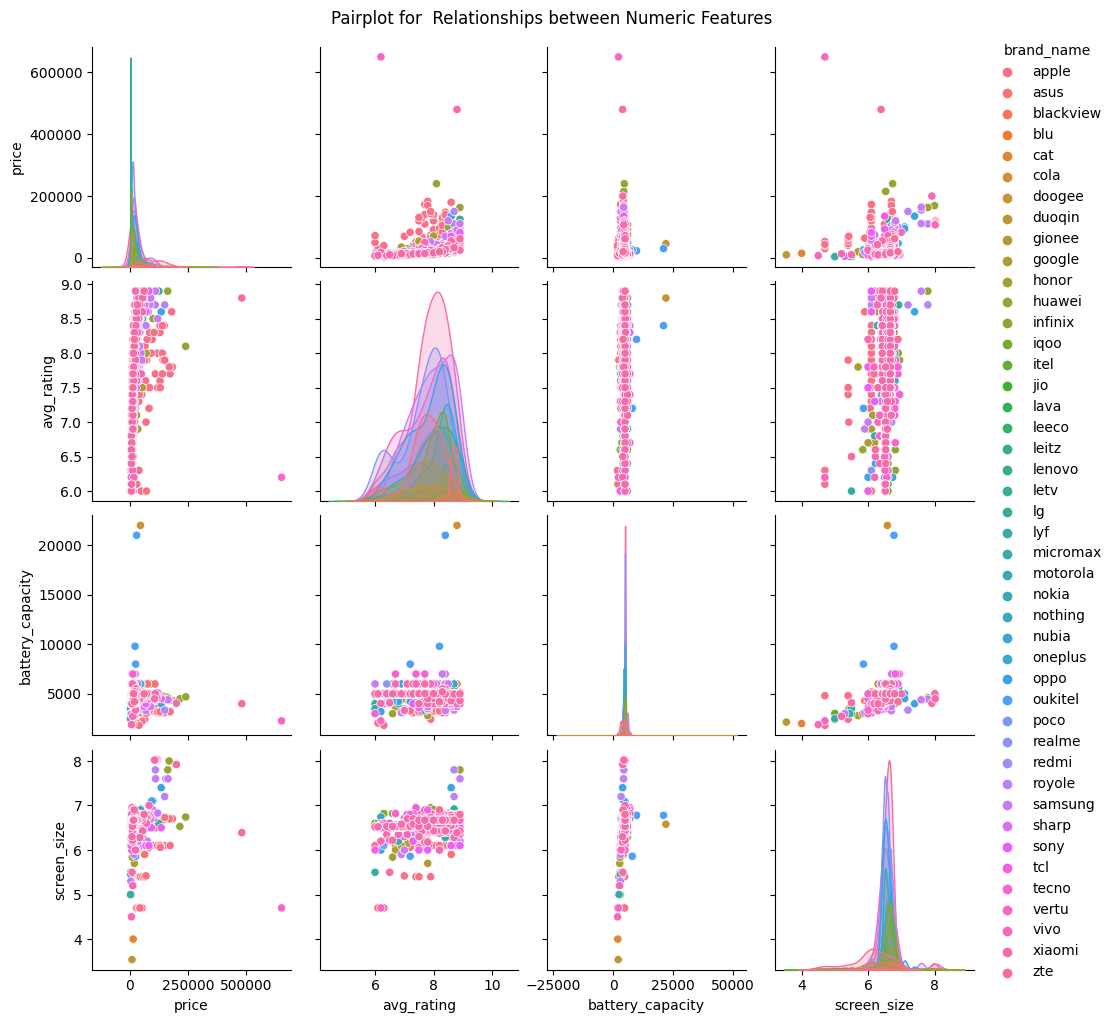

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("C:/Users/tapas/Downloads/smartphones_research.csv")

# Preprocess the data (same preprocessing as before)
mean_battery_capacity_ts= df['battery_capacity'].mean()
df['battery_capacity'].fillna(mean_battery_capacity_ts, inplace=True)
df['pixel_density'] = df['resolution_height'] / df['screen_size']
df.drop(['model', 'resolution_width'], axis=1, inplace=True)
df.dropna(subset=['processor_brand'], inplace=True)
df = pd.get_dummies(df, columns=['processor_brand', 'os'], drop_first=True)

# Plotting a subset of numeric features in the pairplot
subset_features_ts= ['price', 'avg_rating', 'battery_capacity', 'screen_size']

# Check if 'brand_name' column is present before using it for hue
if 'brand_name' in df.columns:
    sns.pairplot(df[subset_features_ts + ['brand_name']], hue='brand_name', diag_kind='kde')
else:
    print("No valid 'brand_name' data to plot.")
    sns.pairplot(df[subset_features_ts], diag_kind='kde')

plt.suptitle('Pairplot for  Relationships between Numeric Features', y=1.02)
plt.show()

In [26]:
pip install nbconvert


Defaulting to user installation because normal site-packages is not writeable
  Using cached nbconvert-7.7.3-py3-none-any.whl (254 kB)
  Using cached bleach-6.0.0-py3-none-any.whl (162 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached jupyterlab_pygments-0.2.2-py2.py3-none-any.whl (21 kB)
  Using cached mistune-3.0.1-py3-none-any.whl (47 kB)
  Using cached nbclient-0.8.0-py3-none-any.whl (73 kB)
  Using cached nbformat-5.9.2-py3-none-any.whl (77 kB)
  Using cached pandocfilters-1.5.0-py2.py3-none-any.whl (8.7 kB)
  Using cached tinycss2-1.2.1-py3-none-any.whl (21 kB)
  Using cached fastjsonschema-2.18.0-py3-none-any.whl (23 kB)
  Using cached jsonschema-4.18.6-py3-none-any.whl (83 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Using cached jsonschema_specifications-2023.7.1-py3-none-any.whl (17 kB)
  Using cached referencing-0.30.0-py3-none-any.whl (25 kB)
                                   


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
